In [1]:
%matplotlib widget 
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import string
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn-v0_8-bright')
palette = 'winter'

myrcparams = {
    'axes.labelsize': 20,
    'axes.titlesize': 18,
    'legend.fontsize': 14,
    'legend.title_fontsize':20,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    #'figure.autolayout': True,
}
plt.rcParams.update(myrcparams)

# Read in data

In [2]:
df = pd.read_csv('history.csv', index_col=0)
df

,Cu,NaOH,median_ratio,fit_B,fit_A,fit_C
0,100.0,5.0,NaN,0.900000,1.000000,2.729965
1,125.0,5.0,NaN,0.900000,1.000000,2.868351
2,150.0,5.0,NaN,NaN,NaN,NaN
3,175.0,5.0,NaN,NaN,NaN,NaN
4,200.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
283,275.0,24.0,1.045752,1.543464,0.005812,0.586938
284,300.0,24.0,1.030849,1.519380,0.004675,0.529264
285,325.0,24.0,1.048951,1.822308,0.003292,0.659164
286,350.0,24.0,1.034483,1.774114,0.002309,0.520146


In [3]:
X = df[ ['Cu', 'NaOH'] ]
targets = {'median_ratio':'Median ratio', 'fit_A':r'$A_{fit}$', 'fit_B':r'$B_{fit}$', 'fit_C':r'$C_{fit}$'}

# Relationships between targets

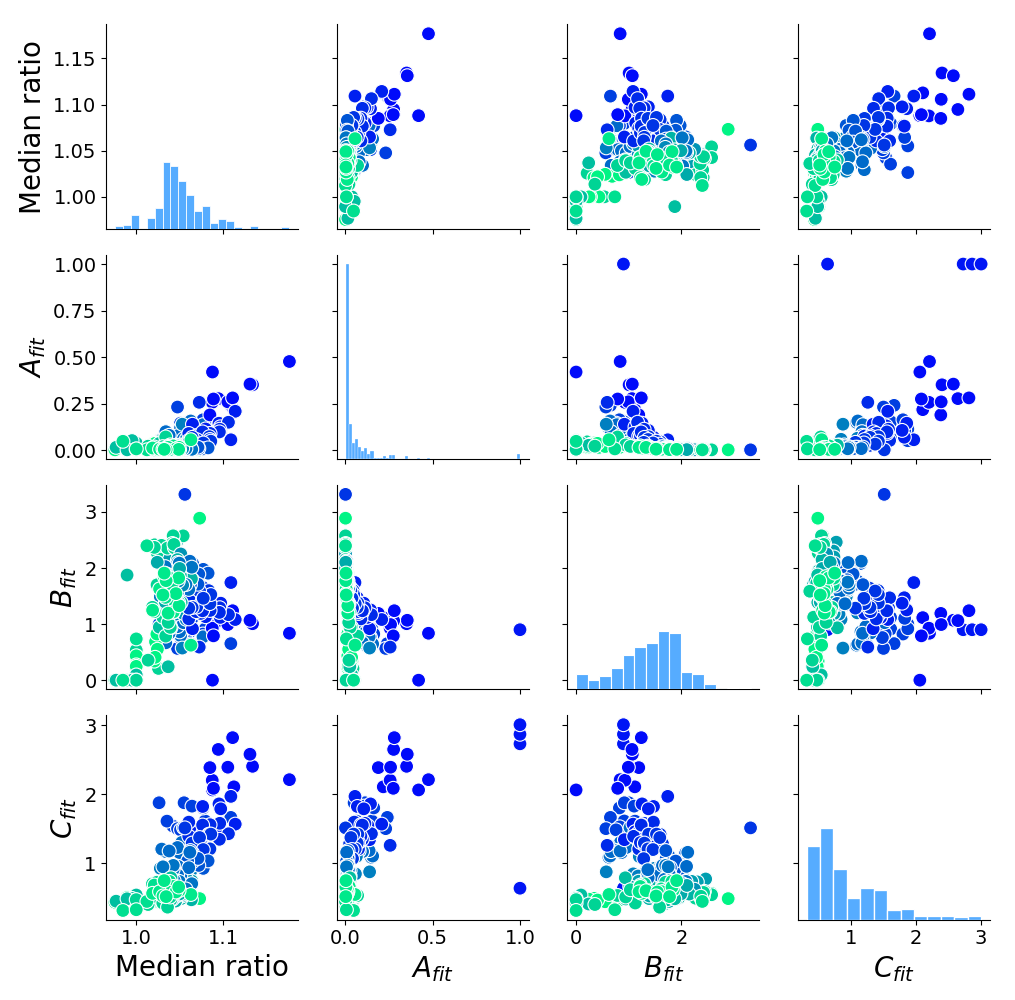

In [4]:
df['NaOH'] = df['NaOH'].astype(str)

g = sns.PairGrid(data = df, vars=targets)
g.map_diag(sns.histplot, hue=None, color="dodgerblue", ec='white')
g.map_offdiag(sns.scatterplot, s=100, data=df,  hue="NaOH", hue_order = df.NaOH.astype(float).sort_values(ascending=True).astype(str), palette=palette, legend=False)
g.add_legend()

xlabels,ylabels = [],[]
for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)

for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(targets[ xlabels[i] ])
        g.axes[j,i].yaxis.set_label_text(targets[ ylabels[j] ])

fig = g.fig
fig.savefig(f"pairplot_naoh.png", dpi=600)

## Colorbar for pair plot

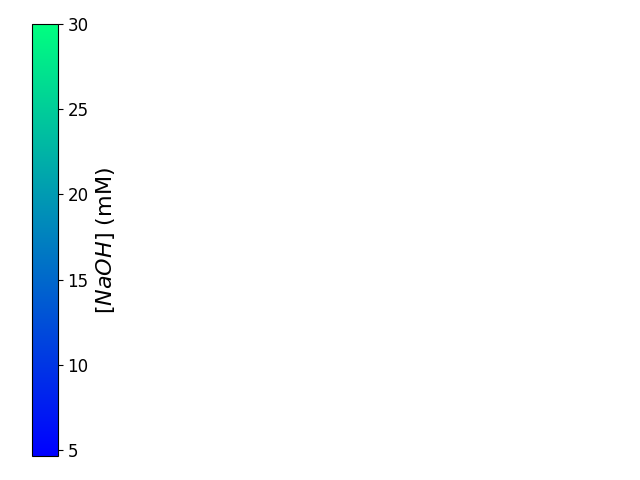

In [5]:
fig,ax = plt.subplots()
naoh_arr = np.array([[float(df['NaOH'].astype(float).min()), float(df['NaOH'].astype(float).max())]])
img = ax.imshow(naoh_arr, cmap=palette)
ax.set_visible(False)
cax = plt.axes([0.05, 0.05, 0.04, 0.9])
cbar = fig.colorbar(img, cax=cax)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('$[NaOH]$ (mM)', fontsize=16)
fig.savefig('pairplot_cbar.png', dpi=600)

## Targets as a function of NaOH, CuCl2

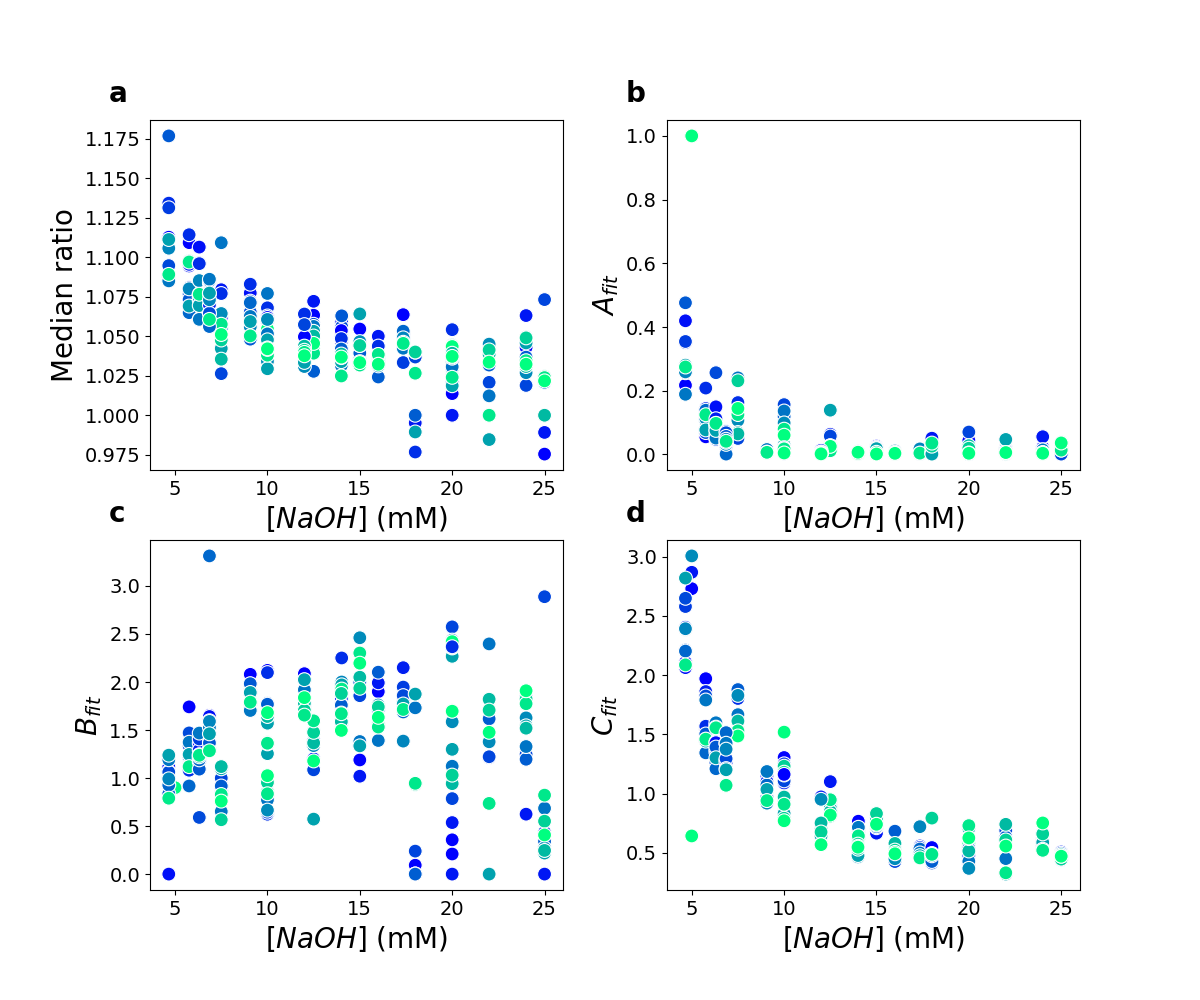

In [6]:
df['NaOH'] = df['NaOH'].astype(float)
fig,axes = plt.subplots(2, 2, figsize=(12.0, 10.0))
for i, target in enumerate(targets):

    sc = sns.scatterplot(data=df, x='NaOH', y=target, hue='Cu', hue_order = df.Cu.astype(float).sort_values(ascending=True).astype(str), s=100, palette=palette, ax=axes[i//2, i%2])
    axes[i//2, i%2].get_legend().remove()
        
    axes[i//2, i%2].set_xlabel('$[NaOH]$ (mM)')
    axes[i//2, i%2].set_ylabel(targets[target])
    axes[i//2, i%2].text(-0.1, 1.05, f'{string.ascii_lowercase[i]}', transform=axes[i//2, i%2].transAxes, 
            size=20, fontweight='bold')
plt.subplots_adjust(wspace=0.25)
fig.savefig(f"scatter_naoh.png", dpi=600)

## Colorbar for scatter plot

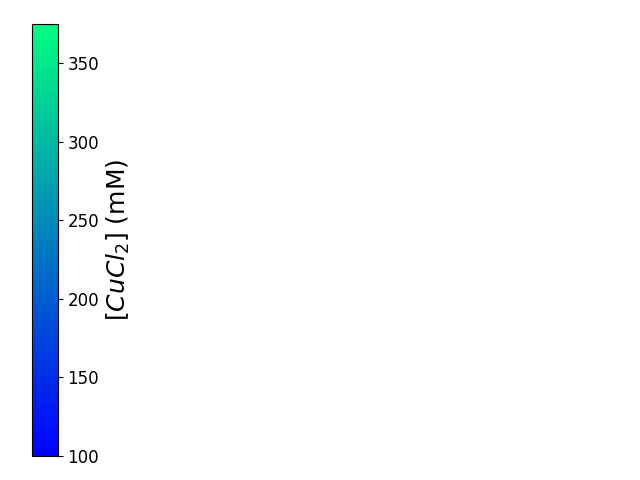

In [7]:
fig,ax = plt.subplots()
cucl2_arr = np.array([[float(df['Cu'].astype(float).min()), float(df['Cu'].astype(float).max())]])
img = ax.imshow(cucl2_arr, cmap=palette)
ax.set_visible(False)
cax = plt.axes([0.05, 0.05, 0.04, 0.9])
cbar = fig.colorbar(img, cax=cax)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('$[CuCl_{2}]$ (mM)', fontsize=18)
fig.savefig('scatterplot_cbar.png', dpi=600)